In [1]:
import sys
sys.path.append('../')

import jax 
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

from sphere.model.implementations.solvers.euler import EulerSolver

def SIR_RHS(x_t,t):
    S,I,R = x_t
    N = S + I + R
    dS = -0.3 * S * I/N
    dI = 0.3 * S * I/N - 0.1 * I
    dR = 0.1 * I
    return jnp.array([dS,dI,dR])

args = {"func":SIR_RHS}

solver = EulerSolver(args = args, delta_t = 0.1)

num_steps = 100 * int(1/solver.delta_t)

x_t = jnp.ones((3,num_steps))

x_t = x_t.at[:,0].set(jnp.array([500,5,0]))


for t in range(1,num_steps):
    x_t = x_t.at[:,t].set(solver.solve(x_t[:,t-1],t))

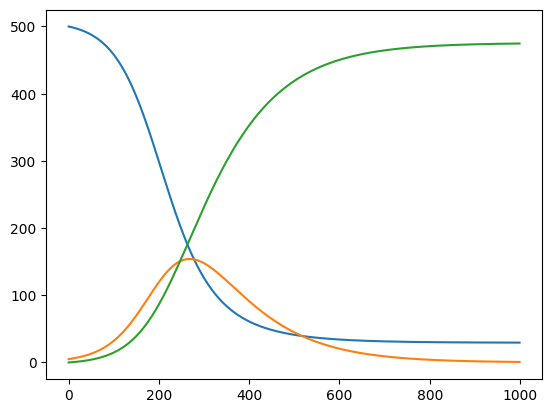

In [2]:
for compartment in range(3):
    plt.plot(x_t[compartment,:])

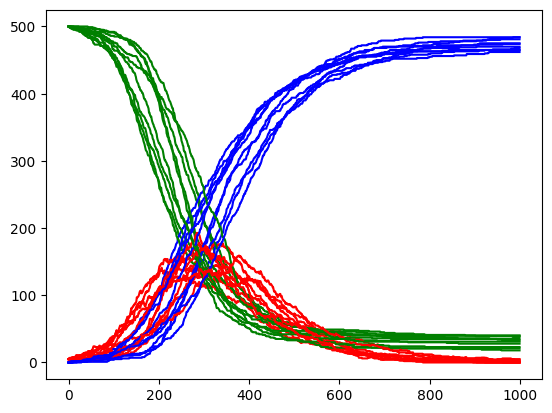

In [3]:
from sphere.model.implementations.solvers.tau_leap import TauLeapSolver
from jax.random import PRNGKey

def events(x_t,t):
    S,I,R = x_t
    N = S + I + R

    return jnp.array([(0.3 * S * I)/N , 0.1 * I])

args = {'rates':events, 'transitions': lambda : [[(0,'-')],[(0,'+'),(1,'-')],[(1,'+')]]}



num_steps = 100 * int(1/0.1)


for key in np.arange(10):

    key = PRNGKey(key)
    solver = TauLeapSolver(tau = 0.1,prng_key = key, args = args)


    x_t = jnp.ones((3,num_steps))

    x_t = x_t.at[:,0].set(jnp.array([500,5,0]))

    for t in range(1,num_steps):
        x_t = x_t.at[:,t].set(solver.solve(x_t[:,t-1],t))

    colors = ['green','red','blue']
    for compartment in range(3):
        plt.plot(x_t[compartment,:],color = colors[compartment])
plt.show()

In [4]:
vals = jax.random.poisson(key = PRNGKey(seed = 5), lam = jnp.array([1.1,0.5,2]), shape = (5,3))

print(vals)

[[1 0 1]
 [2 0 0]
 [0 1 3]
 [1 1 2]
 [0 1 0]]
